# Cost/Loss Function and Batch Gradient Descent iterative method for a Simple Linear Regression

The purpose of this notebook is to briefly and qualitatively showcase how BGD basically operates within a simple, small and aleatory training dataset.

You will manifestly notice that all of the functions and methods that will be constructed here are part of already built-in functions and methods within some Python libraries such as `scikit-learn` or `keras`. Speaking of which, let us import the ones we will be utilizing here:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['tableau-colorblind10'])
%matplotlib inline

Next, let us suppose a simple linear regression line such as:


\begin{equation}\ h_\theta(x) = \theta_0+\theta_1*x \end{equation}


Let us as well assume the following `bias` (intercept) and `weight` (slope or coeffic.) parameters are, respectively, for example:

 \begin{equation}\theta_0= 2\end{equation}    
 
 \begin{equation} \theta_1= 5 \end{equation} 

 



We then proceed to generate some random dataset with some Gaussian noise with, say 50 observations. This is:



In [25]:
th0 = 2
th1 = 5
x_scal = 3
obs = 50
# independ. features (input)
X = x_scal * np.random.rand(obs,1)           

# depend. features   (output)
y = th0 + th1 * X + np.random.randn(obs,1)   


Please note that we have multiplied the independent features by the scalar `x_scal` so that we can define better the plotting range/parameters further on. Otherwise we would have encountered difficulties when visualizing the results.


We can plot this observations / training dataset such as:

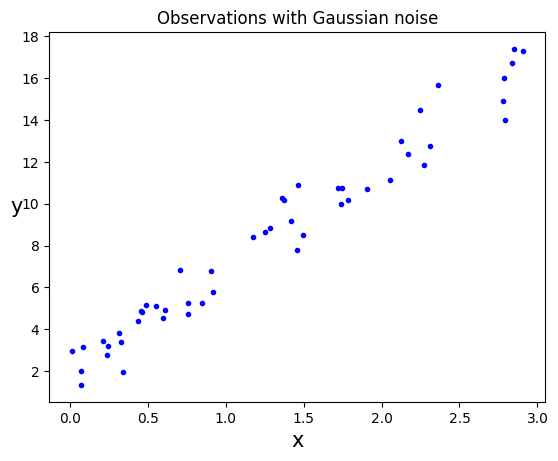

In [4]:
plt.plot(X,y,'b.')
plt.title('Observations with Gaussian noise')
plt.xlabel("x",
            fontsize = 15)
plt.ylabel("y",
            rotation = 0,
            fontsize = 15)
plt.show()


Let us now retrieve from the [Ordinary/Linear Least Squares](https://en.wikipedia.org/wiki/Linear_least_squares#:~:text=Linear%20least%20squares%20(LLS)%20is,and%20generalized%20(correlated)%20residuals.) approximation, the resulting equation of it:




\begin{equation}
\beta = (X^{T}  X)^{-1}X^{T} y
\end{equation}


Where in our case, $\beta$ is a 2D array composed by the bias and weight coefficients  we are trying to solve, $X$ is the matrix of independent features, and $y$ is the dependent variable.

Since we have supposed initially that we know the absolute true equation of the line, we know both of these 2 last ones components. 

Thus, we proceed to code the resolution of this algebraic calculation:


In [26]:
# concatenate an identity vector with our independ.features (input)
X_b = np.c_[np.ones((len(X)
                     ,1)),
            X] 

# we perform dot product with transposed,
# as noted in the markdown cell above
best_thetas = np.linalg.\
              inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 


best_thetas

array([[2.50113552],
       [4.8426567 ]])

We find that these new `bias` and `weight` are close to the ones we assumed before. 

It is noticeable that these cannot be exactly the same ones we initially supposed because of the Gaussian noise we applied.

With these estimated parameters, we proceed to determine the equation of this estimated/predicted linear regression line: 

In [6]:
# range of the x-axis projection of the regression line [0 < x < 3 = x_scal]. 
# This 2D vector will impose  which values the depend. variable is assigned
X_predict = np.array([[0]
                      ,[x_scal]])  

# prime a 2-squared matrix 
# and assign to it the concatenation of an 2 dim Id. vector with the previous one
X_new_b = np.c_[np.ones((2,1)),
                X_predict]

# dot product of former 2-sq. matrix with 'best-thetas' coeff.
# output values (y) for range [0 < x < 3]
y_predict = X_new_b.dot(best_thetas)

# note further on the range of the predicted/regression line when plotting it                  
y_predict 


array([[ 2.00631837],
       [16.93391971]])

The result of this code are the dependable values for some of the 2 points we needed to render our regression line. 

Let us plot this line such as:

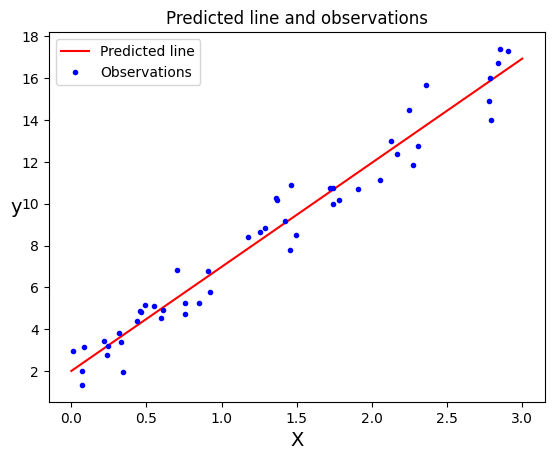

In [7]:
plt.title('Predicted line and observations')
plt.plot(X_predict,y_predict,
         'r-',
         label = 'Predicted line')

plt.plot(X,y,
         'b.', label = 'Observations')
plt.legend()
plt.xlabel("X",
            fontsize = 14)
plt.ylabel("y", 
            fontsize = 14,
            rotation = 0
            )
plt.show()


Thus, we find a regression line which fits the observation points we generated before. Now, what if we could find a regression line for which the error throughout all the observation points could be minimized? 

![image](assets/hypothesis_LR.png)


Let us better visualize the concept of `Least Square` method to understand the concept of `best-fit` line:

<img src="assets/LLS.png" alt="100" width="700"/>

This is to say: amongst all the regression lines, we will be aiming to find the `best-fit` line which shortens to the minimum its vertical distance/offset
 to all the observation points, respectively. And so, here is where `Gradient Descent` arrives on the scene. 

## (Batch) Gradient Descent (BGD)





Gradient descent is an iterative optimization algorithm often used for finding the weights or coefficients of `Machine Learning algorithms`.  For example, in `Logistic Regressions` we aim to optimize Squiggles , in `t-SNE`s it will be clusters, and in this case of a `Simple Linear Regression` we want to optimize the `intercept` and `slope` of a `best-fit` line. 


Hence, the goal of the algorithm is to find these parameters of the model  - i.e. coefficients or weights - that minimize the error of the model in the training dataset, as shown in the previous image. This will be accomplished by training/"making changes" to the model that moves `downward` along a gradient/derivative  - slope - of errors towards minimum value. For that reason, “Gradient `Descent`" is named after the direction of its movement. Some of the characteristics of BGD algorithms are briefly mentioned at the end of this notebook. 

Not limited to Simple Linear Regression, the principal set-up for all `Learning Neural Networks` is to define a `Cost/Loss function`. This function will be an indicator of how well the network/model predicts outputs on the test set.

Let us now visualize and define a generic and aleatory  `Cost function` and its `Partial derivates`:

<img src="assets/cost_interc._slope.png" alt="100" width="600"/>

Where the notation in our equations for the intercept and the slope parameters are $\theta_0$ and $\theta_1$, respectively.

### Cost Function

It mainly quantifies the overall error throughout the entire dataset between the predicted and expected dependent values. Please note that these subtractions are squared so as to regard the absolute value of them in case there is any negative value. 


\begin{equation}
J(\theta_0,\theta_1) = 1/2  m \sum_{i=1}^{m} (h_\theta(x)^{(i)} - y^{(i)})^2 
\end{equation}

This function will be the best indicator to know how well our model is predicting for each iteration. 
If we plot an aleatory equation of a  `Cost Function`, the result could be such as:

<img src="assets/cost_function_3D.png" alt="100" width="700"/>

In order to `minimize` the Cost Function  - and so create a `best-fit` line -,  we need to impose the condition of `Gradient`, also known as `derivative`:

<b>Gradient</b>

Partial `derivative` respect `bias`:

\begin{equation} \frac{\partial (\theta_0,\theta_1)}{\partial \theta_0} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)}) - y^{(i)}) \end{equation} 

Partial `derivative` respect `weight`:

\begin{equation} \frac{\partial (\theta_0,\theta_1)}{\partial \theta_1} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)}) - y^{(i)}) X^{(i)} \end{equation} 

Please note that in this notebook, we will only train our model considering the `partial derivative` of the `bias/intercept` parameter  $\theta_0$ . We will be using this partial derivative further on when introducing the convergence algorithm.

We define the function which will calculate the cost function as stated above:

In [8]:
def  cost_calculation(X,y,theta_cost):

    m = len(y)
    predictions = X.dot(theta_cost)
    abs_error = np.sum(np.square(y - predictions))  # (true minus true pred.)^2
    cost = 1/2 * m * abs_error   
    
    return cost

Next, we need to define the convergence algorithm whose purpose will be to optimize the values for our weight and bias patrameters in each iteration. In this particular case , it will be for the bias parameter $\theta_0$, this is:

\begin{equation}
\theta_0\ = \theta_0\ -  \alpha\frac{\partial J (\theta_0,\theta_1)}{\partial \theta_0} 
\end{equation} 

<img src="assets/1_GTRi-Y2doXbbrc4lGJYH-w.png" alt="100" width="800"/>


Here we introduce the concepts of `learning step` and `learning rate` $\alpha$, which will help us converge towards the minimum of the cost function.

With these parameters, we are going to calculate the new intercept parameter in each iteration we perform.It is remarkable to note that since the slope of the cost function is permanently varying, it is important to select an appropiate learning rate in order not to overshoot the minimum point of the cost function. Some of the common rates normally happen to be 0.3, 0.1, 0.03, 0.01, 0.003 or 0.001. 

Please note that in the previous image the notation does not correspond with our case, since we are to derivate respect $\theta_0$ instead of $\theta_1$. Nonetheless, the nature of the calculus methodology remains the same. This can be coded as :

In [9]:
def gradient_descent(X,y,new_intercept,
                     iter = 100, 
                     learning_rate = .03):


    m = len(y)
    # initialize arrays to collect historical values 
    # for cost and intercept/bias parameters
    cost_history = np.zeros(iter)
    intercept_history = np.zeros((iter,2))
    # repeat until convergence
    for i in range(iter):
        
        # derivative resp. theta_0 (bias)
        prediction = np.dot(X,new_intercept)
        gradient = 1/m * X.T.dot((prediction - y))   
        # find updated intercept
        learning_step = learning_rate * gradient
        new_intercept = new_intercept - learning_step

        # assign cost funct. closer to gobal minimum point
        intercept_history[i , :] = new_intercept.T
        cost_history[i]  = cost_calculation(X,y,new_intercept)
  
        
    return new_intercept, cost_history, intercept_history

We can run now our gradient descent function :


In [56]:
X_b = np.c_[np.ones((len(X),1)),
            X]
theta_0 = np.random.randn(2,1)

theta_0,cost_history,intercept_history = gradient_descent(X_b, y, theta_0)

bias = theta_0[0][0]
weight = theta_0[1][0]
    
print(
    f"{'Bias (theta_0):':<15}{bias.round(3): > 10}",
    f"\n{'Weight (theta_1):':<15}{weight.round(3): > 10}",
    f"\n{'Cost/MSE:':<15}{cost_history[-1].round(3): > 10}",
      
)

Bias (theta_0):     1.793 
Weight (theta_1):     5.199 
Cost/MSE:        1366.432


We see that the slope and intercept values for the best-fit line are similar to the ones we initially supposed. Nevertheless, these last ones render a regression line which minimizes the distance between the training dataset and the regression line.

 We are to plot both of these regression lines:

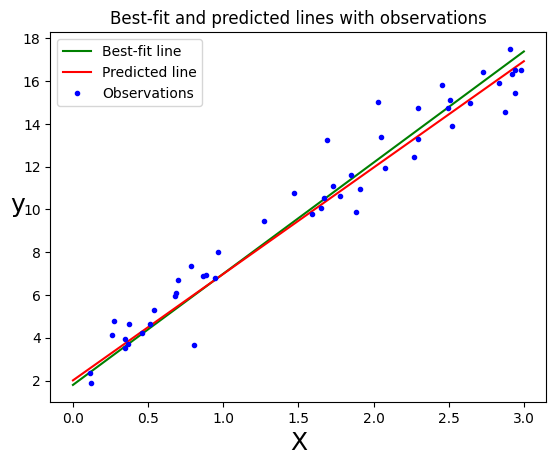

In [57]:
plt.title('Best-fit and predicted lines with observations')

# define best-fit based on its slope, intercept and 2 [points]  
x1, y1 = [0, x_scal], [bias, bias + weight * x_scal]
plt.plot(x1, y1,
         'g-',
         label = 'Best-fit line')     
         
# all this code was already fetched before
plt.plot(X_predict,y_predict,
         'r-',
         label = 'Predicted line')
plt.plot(X,y,
         'b.', label = 'Observations')

plt.xlabel("X",
            fontsize = 18)
plt.ylabel("y", 
            fontsize = 18,
            rotation = 0
            )
plt.legend()
plt.show()



Next, let us plot the evolution of the cost/loss function versus the iterations or epochs the during the training we have performed:

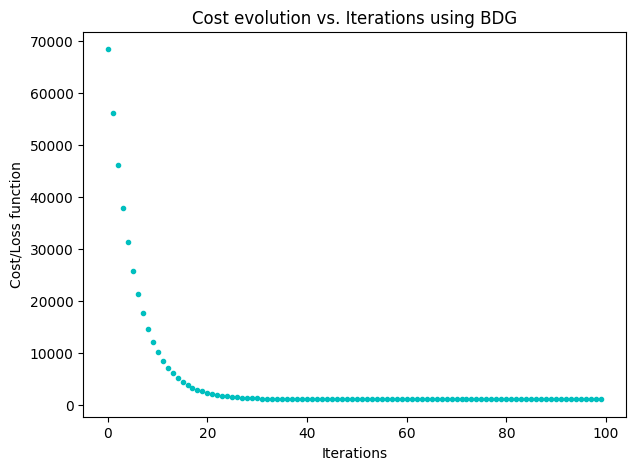

In [14]:
iter = 100
fig,ax = plt.subplots(figsize = (7,5))
ax.set_ylabel('Cost/Loss function')
ax.set_xlabel('Iterations')
_ = ax.plot(range(iter),
            cost_history,
            'c.')

plt.title('Cost evolution vs. Iterations using BDG')
plt.show()

In [106]:
cost_history[-1].round(2)

1237.81

Please note that the cost function does not tend to zero, but to its local minimum as expected:

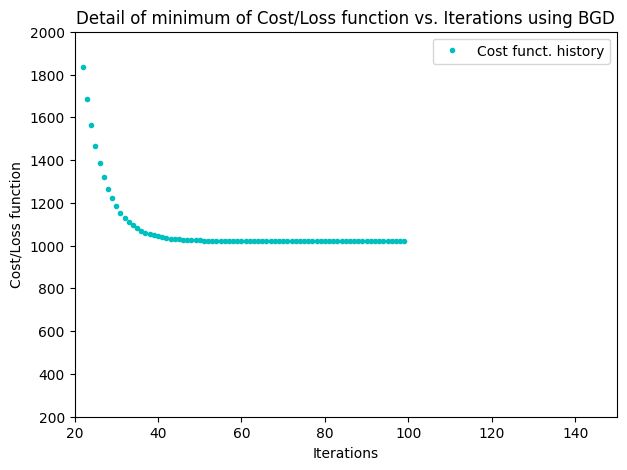

In [15]:

fig,ax = plt.subplots(figsize = (7,5))
_ = ax.plot(range(100),
            cost_history[:100],
            'c.', label = 'Cost funct. history')
ax.set_ylabel('Cost/Loss function')
ax.set_xlabel('Iterations')
plt.legend()
plt.axis([2e1, 1.5e2, 2e2, 2e3])

# zoom into the above range (xmin,xmax,ymin,ymax)
plt.title('Detail of minimum of Cost/Loss function vs. Iterations using BGD')
plt.show()

Please note that if our training dataset had been massive, BGD would not have been the best choice since:

+ The velocity of its convergence would be significantly low
+ The model parameters would only be updated after the entire training had occurred
+ The Learning Rate $\alpha$ would be fixed throughout all the training
+ We might not be able to dodge possible local minima
+ If the model was too complex, overfitting might happen

In some of my next notebooks, I will showcase some applications where we will utilize other methods such as `Stochastic GD` and `Mini-Batch GD` iterative algorithms, while using the derivative calculations for both of the intercept $\theta_0$ and slope $\theta_1$ parameters.

Thank you for reading this!




Source of Literature and Images:

- [KD nuggets - 5 Concepts You Should Know About Gradient Descent and Cost Function](https://www.kdnuggets.com/2020/05/5-concepts-gradient-descent-cost-function.html)
 

- [Machine Learning Mastery - A Gentle Introduction to Mini-Batch Gradient Descent and How to Configure Batch Size](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/)

- [StatQuest - Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)